In [1]:
# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# --- STEP 2: LOAD DATA ---
# Mock dataset: transport_logistics.csv
# Columns: ['Transport_ID', 'Mode', 'Distance_km', 'Fuel_Used_L', 'CO2_Emissions_kg', 'Region', 'Vehicle_Age', 'Load_Capacity_Ton', 'Speed_kmph']

df = pd.read_csv('transport_logistics.csv')

In [3]:
# --- STEP 3: DATA CLEANING ---
df.dropna(inplace=True)

In [4]:
# --- STEP 4: FEATURE ENGINEERING ---
df['Fuel_Efficiency_km_per_l'] = df['Distance_km'] / df['Fuel_Used_L']
df['Emission_per_km'] = df['CO2_Emissions_kg'] / df['Distance_km']

In [5]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Mode', 'Region'], drop_first=True)


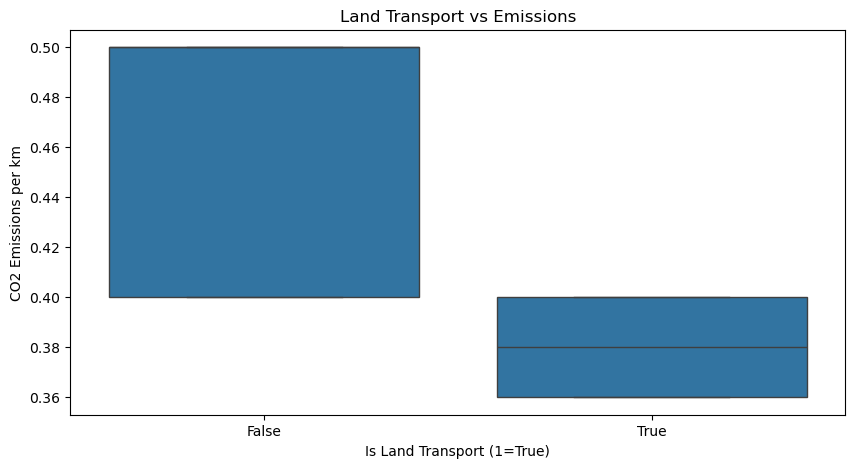

ValueError: could not convert string to float: 'TR-1'

In [7]:
# --- STEP 5: EDA ---
# Updated visualization for Emissions by Transport Mode
plt.figure(figsize=(10, 5))
sns.boxplot(x='Mode_Land', y='Emission_per_km', data=df)
plt.title('Land Transport vs Emissions')
plt.xlabel('Is Land Transport (1=True)')
plt.ylabel('CO2 Emissions per km')
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation')
plt.show()

In [9]:
# --- STEP 6: MODELING ---
features = df.drop(['Transport_ID', 'CO2_Emissions_kg'], axis=1)
target = df['CO2_Emissions_kg']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# --- STEP 7: EVALUATION ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f} kg")
print(f"R² Score: {r2:.2f}")

RMSE: 21.06 kg
R² Score: 1.00


In [11]:
# --- STEP 8: RECOMMENDATION ENGINE ---
def recommend_optimizations(df):
    best_efficiency = df['Fuel_Efficiency_km_per_l'].max()
    suggestions = df[df['Fuel_Efficiency_km_per_l'] < best_efficiency]
    return suggestions[['Transport_ID', 'Fuel_Efficiency_km_per_l', 'Emission_per_km']]

recommendations = recommend_optimizations(df)
print("\nSuggested Optimizations:")
print(recommendations.head())


Suggested Optimizations:
  Transport_ID  Fuel_Efficiency_km_per_l  Emission_per_km
0         TR-1                       6.0              0.5
1         TR-2                       7.5              0.4
3         TR-4                       6.0              0.5
4         TR-5                       7.5              0.4
5         TR-6                       6.0              0.5


In [12]:
# --- STEP 9: SAVE MODEL AND OUTPUT ---
import joblib
joblib.dump(model, 'co2_emission_model.pkl')
df.to_csv('optimized_logistics_data.csv', index=False)
recommendations.to_csv('optimization_suggestions.csv', index=False)
